In [306]:
import pandas as pd
import numpy as np
import math
import scipy.interpolate
from scipy.stats import skewnorm
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

In [2]:
# using laTeX fonts
plt.rcParams.update({'text.usetex': True,
                     'font.family': "sans-serif",
                     'text.latex.preamble': [r'\usepackage{amsmath}']})

In [3]:
! pwd

/Users/alyulina/Projects/Sandpiper/h=sigm/ver23


In [7]:
# averages from Mateusz' email from February 23, 2022 for the sbs and from June 14, 2022 email for the rns:
# sbs_het_mateusz = 0.00057
# rns_het_mateusz = 0.00087

sbs_het_mateusz = np.mean([float(x.split()[3]) for x in ['C_pyg_11        4       nonsyn  0.00054 13366.73        8557.12 2404.81 15773408.0',
                                                         'C_pyg_13        4       nonsyn  0.00058 13536.74        8661.81 2437.46 14863606.0',
                                                         'C_pyg_18        4       nonsyn  0.00057 14046.29        8863.03 2591.63 15595615.0',
                                                         'C_pyg_22        6       nonsyn  0.00056 13787.62        9029.05 2379.29 16244868.0',
                                                         'C_pyg_26        5       nonsyn  0.00057 14149.78        9127.47 2511.15 15978692.0',
                                                         'C_pyg_28        5       nonsyn  0.0005  9660.44 7927.86 866.29  15855318.0',
                                                         'C_pyg_Ep        11      nonsyn  0.00063 6205.04 4419.44 892.8   7005743.0',
                                                         'C_pyg_09        5       nonsyn  0.00051 12095.35        8362.3  1866.52 16427866.0',
                                                         'C_pyg_12        4       nonsyn  0.00056 13344.93        8300.36 2522.29 14829928.0',
                                                         'C_pyg_27        4       nonsyn  0.0006  14061.0 8785.25 2637.87 14576396.0',
                                                         'C_pyg_29        5       nonsyn  0.00053 12336.84        8963.34 1686.75 16952071.0',
                                                         'C_pyg_b1        19      nonsyn  0.00057 11991.69        10046.54        972.57  17724355.0',
                                                         'C_pyg_b2        17      nonsyn  0.00064 13579.46        11620.48        979.49  18083679.0',
                                                         'C_pyg_em        14      nonsyn  0.00058 15916.7 10379.25        2768.72 17931701.0']]);

rns_het_mateusz = np.mean([float(x.split()[3]) for x in [ 'C_ruf_01        4       nonsyn  0.001   15696.79        10620.22        2538.28 10641098.0',
                                                          'C_ruf_02        6       nonsyn  0.00092 24248.22        15210.3 4518.96 16503287.0',
                                                          'C_ruf_03        4       nonsyn  0.00085 9094.78 5323.59 1885.6  6290911.0',
                                                          'C_ruf_05        4       nonsyn  0.0009  16135.93        10337.85        2899.04 11548033.0',
                                                          'C_ruf_06        4       nonsyn  0.00089 18749.88        11396.35        3676.77 12851589.0',
                                                          'C_ruf_07        4       nonsyn  0.00074 11378.14        6611.48 2383.33 8930464.0',
                                                          'C_ruf_08        4       nonsyn  0.00076 9431.13 5598.96 1916.09 7360713.0',
                                                          'C_ruf_09        4       nonsyn  0.00098 17012.99        11391.03        2810.98 11618947.0',
                                                          'C_ruf_12        4       nonsyn  0.00076 9485.91 5766.62 1859.64 7547763.0']])


In [492]:
# generating {mu, sigma, alpha, beta} grid
 
# used to generate mu:
-1 * np.logspace(math.log(abs(-0.05), math.e), math.log(abs(-0.00001), math.e), num=30, endpoint=True, base=math.e);
# used to generate sigma:
np.logspace(math.log(0.00001, math.e), math.log(0.05, math.e), num=30, endpoint=True, base=math.e);

mu = [-0.0500000000000000, -0.0372751426827093, -0.0277887252403267, -0.0207165739660756, -0.0154442650096474, -0.0115137436372836, -0.0085835287378376, -0.0063990451684807, -0.0047705064337644, -0.0035564261597470, -0.0026513258509018, -0.0019765709878144, -0.0014735393118657, -0.0010985277619675, -0.0008189555813651, -0.0006105337229237, -0.0004551546326917, -0.0003393190775256, -0.0002529633405947, -0.0001885848922832, -0.0001405905753532, -0.0001048106751227, -0.0000781366573974, -0.0000582511010648, -0.0000434263620723, -0.0000323744768487, -0.0000241352648763, -0.0000179929088390, -0.0000134137648850, -0.0000100000000000]
sigma = [0.0000100000000000, 0.0000134137648850, 0.0000179929088390, 0.0000241352648763, 0.0000323744768487, 0.0000434263620723, 0.0000582511010648, 0.0000781366573974, 0.0001048106751227, 0.0001405905753532, 0.0001885848922832, 0.0002529633405947, 0.0003393190775256, 0.0004551546326917, 0.0006105337229237, 0.0008189555813651, 0.0010985277619675, 0.0014735393118657, 0.0019765709878144, 0.0026513258509018, 0.0035564261597470, 0.0047705064337644, 0.0063990451684807, 0.0085835287378376, 0.0115137436372836, 0.0154442650096474, 0.0207165739660756, 0.0277887252403267, 0.0372751426827093, 0.0500000000000000]
alpha = [0, -2, -4]
beta = [0, 1000, 3000, 5000, 7000]

mu_cut = [x for x in mu if x > -0.015]
sigma_cut = [x for x in sigma if x < 0.015]

mu_sigma = [[x, y] for x in mu for y in sigma]
alpha_beta = [[x, y] for x in alpha for y in beta]

In [366]:
# reading mu, sigma, alpha, beta, het for which we ran simulations:
# (see notebook-ver23.ipynb for mu, sigma, alpha, beta values and parsing-hets-out.ipynb for het values)

with open('rns-hets-points_rns_avg-het.txt') as f:
    rns_het_sim = [[x.split()[i] for i in [1, 3, 5, 7, 9]] for x in f.readlines()] # as strings not floats!
    
with open('sbs-hets-points_rns_avg-het.txt') as f:
    sbs_het_sim = [[x.split()[i] for i in [1, 3, 5, 7, 9]] for x in f.readlines()] # as strings not floats!

In [392]:
[x[:-1] for x in rns_het_sim] == [x[:-1] for x in sbs_het_sim]

True

In [394]:
mu_sigma_alpha_beta_rns_sbs_dict = {}
for i in range(len(rns_het_sim)):
    mu_sigma_alpha_beta_rns_sbs_dict['_'.join(rns_het_sim[i][:-1])] = [rns_het_sim[i][-1], sbs_het_sim[i][-1]]

In [367]:
rns_errors = [abs(float(x[-1]) - rns_het_mateusz) / rns_het_mateusz for x in rns_het_sim]
sbs_errors = [abs(float(x[-1]) - sbs_het_mateusz) / sbs_het_mateusz for x in sbs_het_sim]

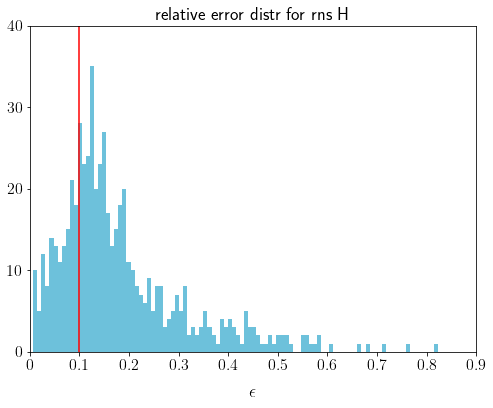

In [544]:
plt.figure(figsize=(8, 6))
plt.hist(rns_errors, bins=100, color='#6dc1db');

plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 
           [r'$0$', r'$0.1$', r'$0.2$', r'$0.3$', r'$0.4$', r'$0.5$', r'$0.6$', r'$0.7$', r'$0.8$', r'$0.9$'], size=16); 
plt.yticks([0, 10, 20, 30, 40], [r'$0$', r'$10$', r'$20$', r'$30$', r'$40$'], size=16)
plt.axvline(0.1, color='red')
plt.xlim(0, 0.9); plt.ylim(0, 40); 
plt.xlabel(r'$\epsilon$', labelpad=12, fontsize=18);

plt.title('relative error distr for rns H', fontsize=18)

#plt.savefig('relative_error_in_H_rns_distr.png', dpi=300, bbox_inches='tight')

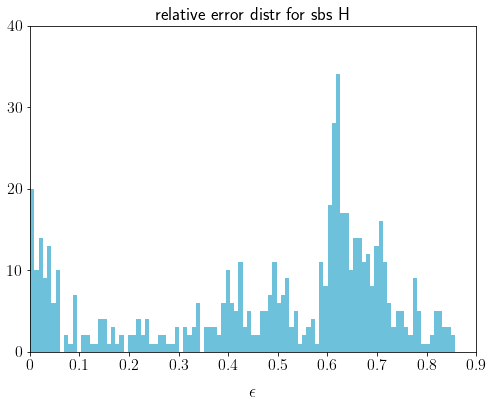

In [377]:
plt.figure(figsize=(8, 6))
plt.hist(sbs_errors, bins=100, color='#6dc1db');

plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 
           [r'$0$', r'$0.1$', r'$0.2$', r'$0.3$', r'$0.4$', r'$0.5$', r'$0.6$', r'$0.7$', r'$0.8$', r'$0.9$'], size=16); 
plt.yticks([0, 10, 20, 30, 40], [r'$0$', r'$10$', r'$20$', r'$30$', r'$40$'], size=16)
#plt.axvline(0.1, color='red')
#plt.axvline(0.05, color='red', alpha=0.5)
plt.xlim(0, 0.9); plt.ylim(0, 40); 
plt.xlabel(r'$\epsilon$', labelpad=12, fontsize=18);

plt.title('relative error distr for sbs H', fontsize=18)

# plt.savefig('relative_error_in_H_sbs_distr.png', dpi=300, bbox_inches='tight')

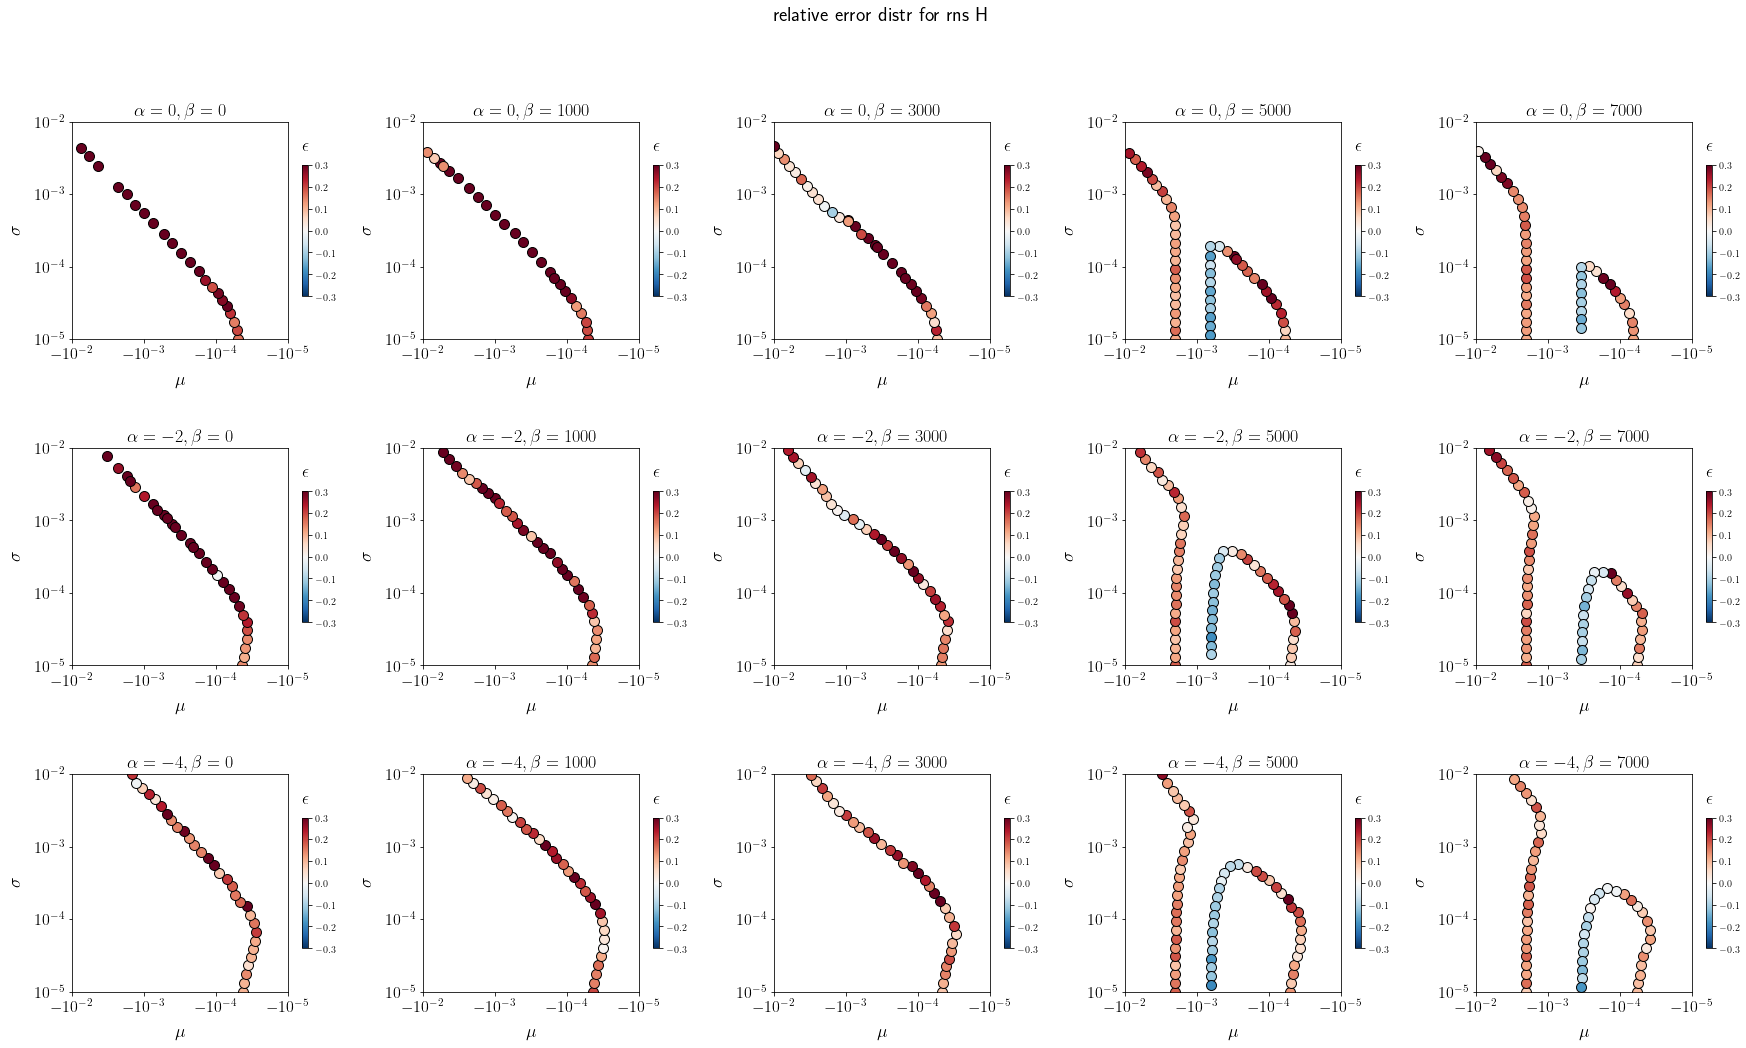

In [385]:
div_cmap = matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=-0.3, vmax=0.3), 
                                        cmap=plt.get_cmap('RdBu_r'))


plt.figure(figsize=(30, 16))

grid = gridspec.GridSpec(ncols=5, nrows=3,
                         width_ratios=[1, 1, 1, 1, 1], wspace=0.3,
                         height_ratios=[1, 1, 1], hspace=0.5)

for i in range(len(alpha_beta)):
    
    plt.subplot(grid[i // len(beta), i % len(beta)])
    
    for j in rns_het_sim:
        if ['{:.1f}'.format(alpha_beta[i][0]), '{:.0f}'.format(alpha_beta[i][1])] != j[-3:-1]:
            continue
            
        error = (float(j[-1]) - rns_het_mateusz) / rns_het_mateusz
            
        plt.scatter(-np.log(abs(float(j[0]))), np.log(float(j[1])), s=100, color=div_cmap.to_rgba(error), edgecolors='#000000') 
    
    plt.colorbar(div_cmap, shrink=0.6)
    plt.text(-np.log(abs(-0.0000064)), np.log(0.004), r'$\epsilon$', size=18)
            
    plt.xlim(-np.log(abs(-0.01)), -np.log(abs(0.00001)))
    plt.ylim(np.log(abs(0.00001)), np.log(abs(0.01)))

    plt.yticks([np.log(0.01), np.log(0.001), np.log(0.0001), np.log(0.00001)], [r'$10^{-2}$', r'$10^{-3}$', r'$10^{-4}$', r'$10^{-5}$'], fontsize=16)
    plt.xticks([-np.log(abs(-0.01)), -np.log(abs(-0.001)), -np.log(abs(-0.0001)), -np.log(abs(-0.00001))], [r'$-10^{-2}$', r'$-10^{-3}$', r'$-10^{-4}$', r'$-10^{-5}$'], fontsize=16)

    plt.xlabel(r'$\mu$', labelpad=12, fontsize=18);
    plt.ylabel(r'$\sigma$', labelpad=12, fontsize=18);
    plt.title(r'$\alpha=' + str(alpha_beta[i][0]) + r', \beta=' + str(alpha_beta[i][1]) + r'$', fontsize=18)
    
plt.suptitle('relative error distr for rns H', fontsize=20)
    
# plt.savefig('relative_error_in_H_rns.png', dpi=300, bbox_inches='tight')

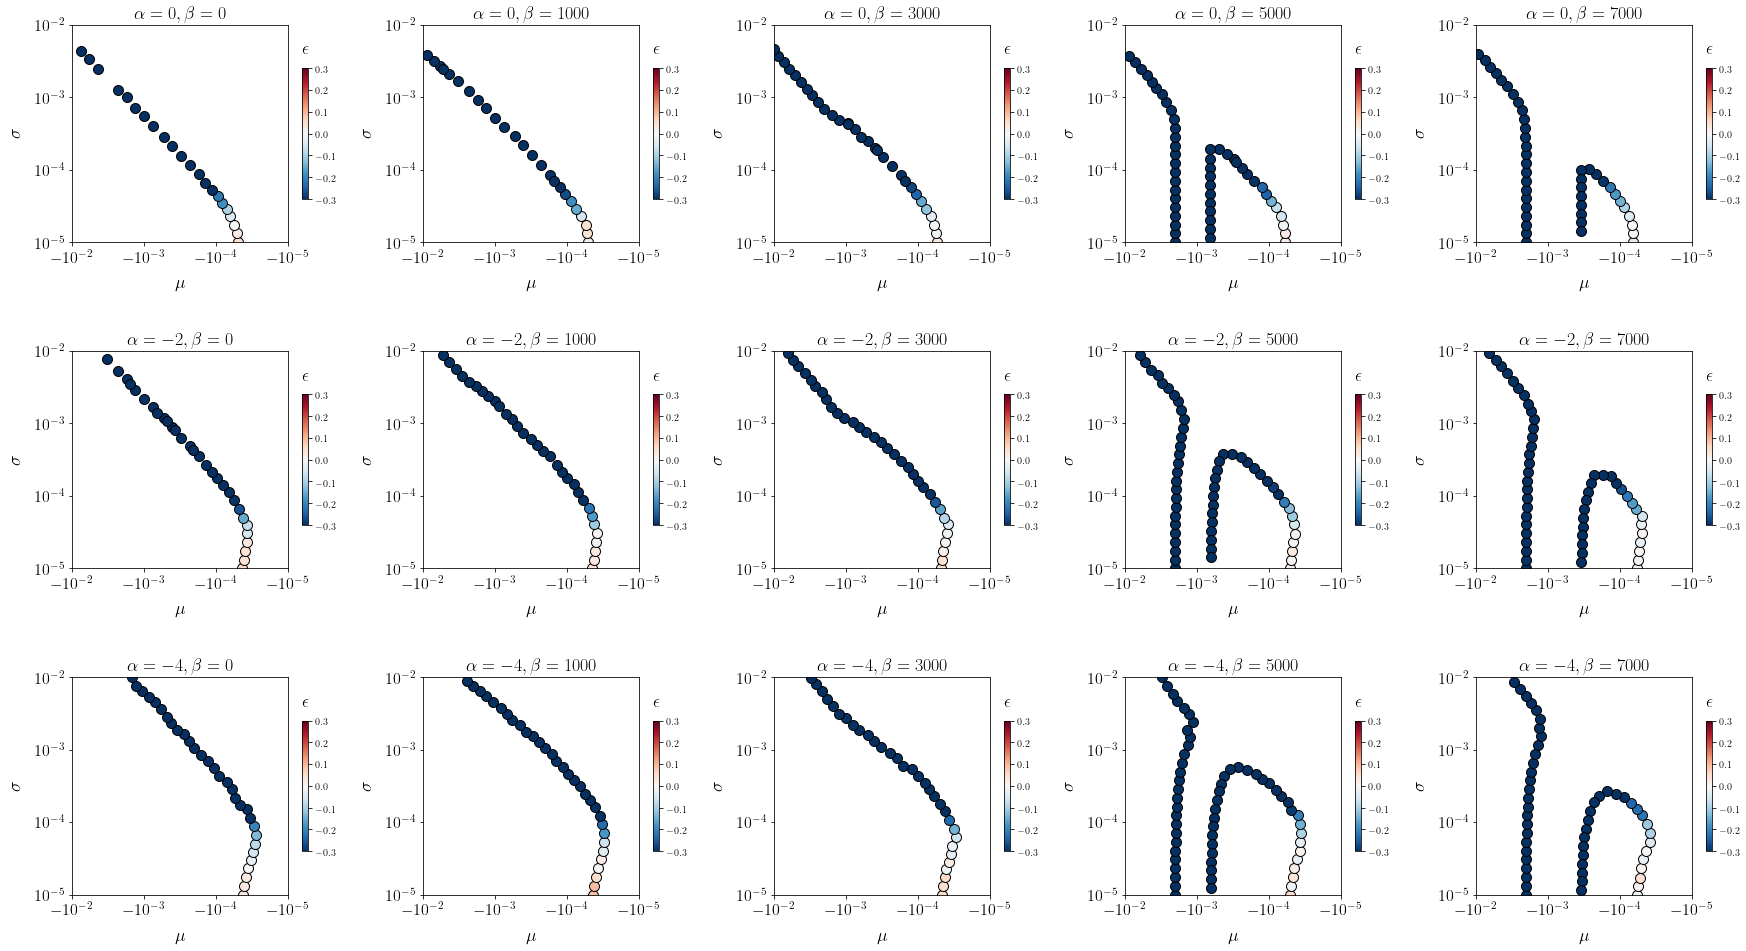

In [401]:
div_cmap = matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=-0.3, vmax=0.3), 
                                        cmap=plt.get_cmap('RdBu_r'))


plt.figure(figsize=(30, 16))

grid = gridspec.GridSpec(ncols=5, nrows=3,
                         width_ratios=[1, 1, 1, 1, 1], wspace=0.3,
                         height_ratios=[1, 1, 1], hspace=0.5)

for i in range(len(alpha_beta)):
    
    plt.subplot(grid[i // len(beta), i % len(beta)])
    
    for j in sbs_het_sim:
        if ['{:.1f}'.format(alpha_beta[i][0]), '{:.0f}'.format(alpha_beta[i][1])] != j[-3:-1]:
            continue
            
        error = (float(j[-1]) - sbs_het_mateusz) / sbs_het_mateusz
            
        plt.scatter(-np.log(abs(float(j[0]))), np.log(float(j[1])), s=100, color=div_cmap.to_rgba(error), edgecolors='#000000') 
    
    plt.colorbar(div_cmap, shrink=0.6)
    plt.text(-np.log(abs(-0.0000064)), np.log(0.004), r'$\epsilon$', size=18)
            
    plt.xlim(-np.log(abs(-0.01)), -np.log(abs(0.00001)))
    plt.ylim(np.log(abs(0.00001)), np.log(abs(0.01)))

    plt.yticks([np.log(0.01), np.log(0.001), np.log(0.0001), np.log(0.00001)], [r'$10^{-2}$', r'$10^{-3}$', r'$10^{-4}$', r'$10^{-5}$'], fontsize=16)
    plt.xticks([-np.log(abs(-0.01)), -np.log(abs(-0.001)), -np.log(abs(-0.0001)), -np.log(abs(-0.00001))], [r'$-10^{-2}$', r'$-10^{-3}$', r'$-10^{-4}$', r'$-10^{-5}$'], fontsize=16)

    plt.xlabel(r'$\mu$', labelpad=12, fontsize=18);
    plt.ylabel(r'$\sigma$', labelpad=12, fontsize=18);
    plt.title(r'$\alpha=' + str(alpha_beta[i][0]) + r', \beta=' + str(alpha_beta[i][1]) + r'$', fontsize=18)
    
    
# plt.suptitle('relative error distr for sbs H', fontsize=20)
    
# plt.savefig('relative_error_in_H_sbs.png', dpi=300, bbox_inches='tight')

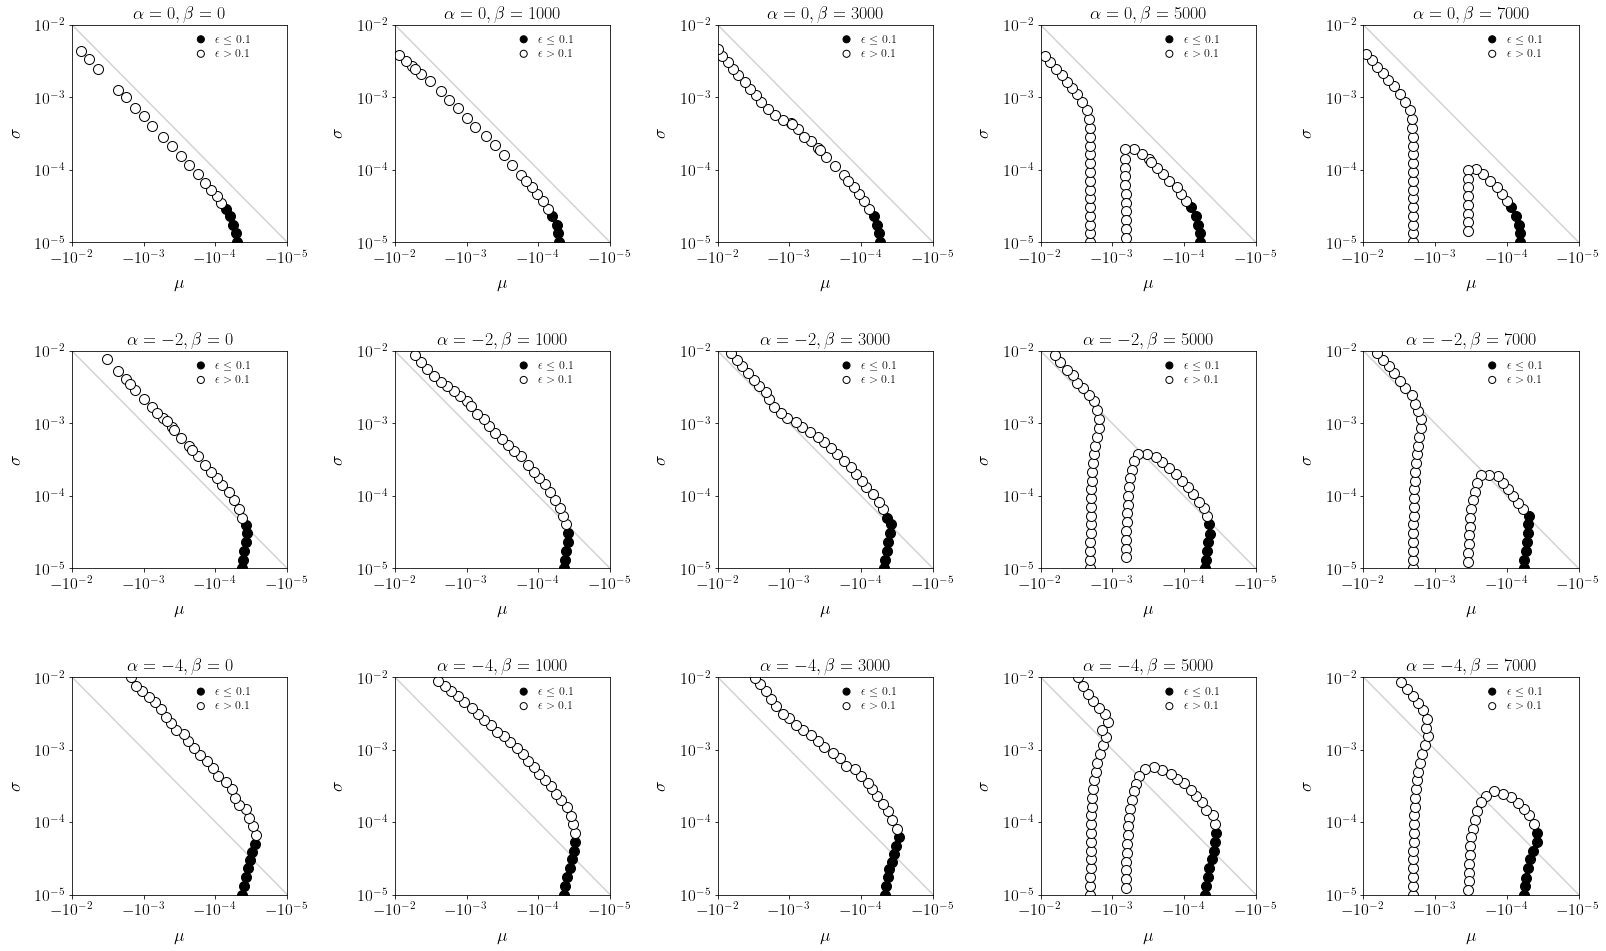

In [719]:
plt.figure(figsize=(27, 16))

grid = gridspec.GridSpec(ncols=5, nrows=3,
                         width_ratios=[1, 1, 1, 1, 1], wspace=0.5,
                         height_ratios=[1, 1, 1], hspace=0.5)

for i in range(len(alpha_beta)):
    
    plt.subplot(grid[i // len(beta), i % len(beta)])
    
    for j in sbs_het_sim:
        if ['{:.1f}'.format(alpha_beta[i][0]), '{:.0f}'.format(alpha_beta[i][1])] != j[-3:-1]:
            continue
            
        abs_error = abs(float(j[-1]) - sbs_het_mateusz) / sbs_het_mateusz
        
        if abs_error <= 0.1:
            c = '#000000'
        else: 
            c = '#ffffff'
            
        plt.scatter(-np.log(abs(float(j[0]))), np.log(float(j[1])), s=100, color=c, edgecolors='#000000')
        
    plt.scatter([-np.log(abs(-0.00016)), -np.log(abs(-0.00016))], 
                [np.log(0.00398107), np.log(0.00630957)], 
                s=50,
                edgecolors='#000000', 
                color=['#ffffff', '#000000'])
    
    plt.plot([-np.log(abs(-0.01)), -np.log(abs(0.00001))], [np.log(abs(0.01)), np.log(abs(0.00001))], c='#d3d3d3', zorder=0)
    
    plt.text(-np.log(abs(-0.0001)), np.log(0.00630957), r'$\epsilon\leq0.1$', size=12, va='center')
    plt.text(-np.log(abs(-0.0001)), np.log(0.00398107), r'$\epsilon>0.1$', size=12, va='center')

        
    plt.xlim(-np.log(abs(-0.01)), -np.log(abs(0.00001)))
    plt.ylim(np.log(abs(0.00001)), np.log(abs(0.01)))

    plt.yticks([np.log(0.01), np.log(0.001), np.log(0.0001), np.log(0.00001)], [r'$10^{-2}$', r'$10^{-3}$', r'$10^{-4}$', r'$10^{-5}$'], fontsize=16)
    plt.xticks([-np.log(abs(-0.01)), -np.log(abs(-0.001)), -np.log(abs(-0.0001)), -np.log(abs(-0.00001))], [r'$-10^{-2}$', r'$-10^{-3}$', r'$-10^{-4}$', r'$-10^{-5}$'], fontsize=16)

    plt.xlabel(r'$\mu$', labelpad=12, fontsize=18);
    plt.ylabel(r'$\sigma$', labelpad=12, fontsize=18);
    plt.title(r'$\alpha=' + str(alpha_beta[i][0]) + r', \beta=' + str(alpha_beta[i][1]) + r'$', fontsize=18)
    
#plt.suptitle('relative error distr for sbs H', fontsize=20)
    
# plt.savefig('relative_error_in_H_sbs<=0.1.png', dpi=300, bbox_inches='tight')

In [594]:
# adding coordinates of points where rns het matches w/ 0.3 lethals
with open('/Users/alyulina/Projects/Sandpiper/h=sigm/ver23/SBS_0.3_lethal_input.txt') as f:
    lethal_points = [x.split()[:4] for x in f.readlines()]

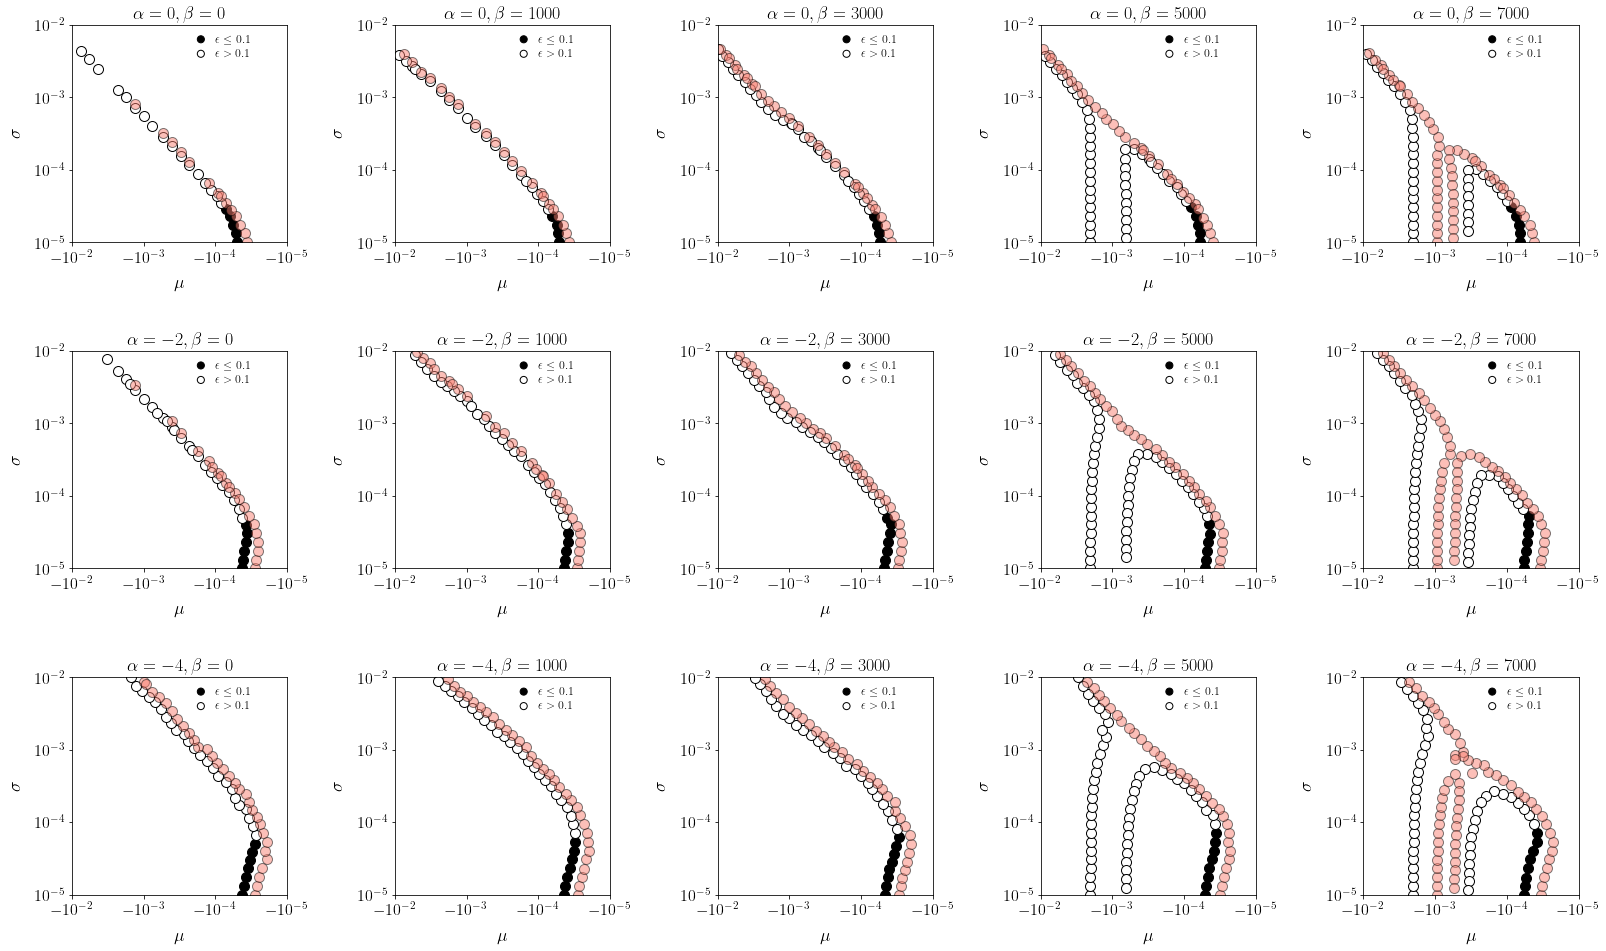

In [600]:
plt.figure(figsize=(27, 16))

grid = gridspec.GridSpec(ncols=5, nrows=3,
                         width_ratios=[1, 1, 1, 1, 1], wspace=0.5,
                         height_ratios=[1, 1, 1], hspace=0.5)

for i in range(len(alpha_beta)):
    
    plt.subplot(grid[i // len(beta), i % len(beta)])
    
    for j in sbs_het_sim:
        if ['{:.1f}'.format(alpha_beta[i][0]), '{:.0f}'.format(alpha_beta[i][1])] != j[-3:-1]:
            continue
            
        abs_error = abs(float(j[-1]) - sbs_het_mateusz) / sbs_het_mateusz
        
        if abs_error <= 0.1:
            c = '#000000'
        else: 
            c = '#ffffff'
            
        plt.scatter(-np.log(abs(float(j[0]))), np.log(float(j[1])), s=100, color=c, edgecolors='#000000')
        
        
    for k in lethal_points:
        if ['{:.1f}'.format(alpha_beta[i][0]), '{:.0f}'.format(alpha_beta[i][1])] != k[2:]:
            continue
            
        plt.scatter(-np.log(abs(float(k[0]))), np.log(float(k[1])), s=100, color='salmon', edgecolors='#000000', alpha=0.5)   
    
    plt.scatter([-np.log(abs(-0.00016)), -np.log(abs(-0.00016))], 
                [np.log(0.00398107), np.log(0.00630957)], 
                s=50,
                edgecolors='#000000', 
                color=['#ffffff', '#000000'])
    
    plt.text(-np.log(abs(-0.0001)), np.log(0.00630957), r'$\epsilon\leq0.1$', size=12, va='center')
    plt.text(-np.log(abs(-0.0001)), np.log(0.00398107), r'$\epsilon>0.1$', size=12, va='center')

        
    plt.xlim(-np.log(abs(-0.01)), -np.log(abs(0.00001)))
    plt.ylim(np.log(abs(0.00001)), np.log(abs(0.01)))

    plt.yticks([np.log(0.01), np.log(0.001), np.log(0.0001), np.log(0.00001)], [r'$10^{-2}$', r'$10^{-3}$', r'$10^{-4}$', r'$10^{-5}$'], fontsize=16)
    plt.xticks([-np.log(abs(-0.01)), -np.log(abs(-0.001)), -np.log(abs(-0.0001)), -np.log(abs(-0.00001))], [r'$-10^{-2}$', r'$-10^{-3}$', r'$-10^{-4}$', r'$-10^{-5}$'], fontsize=16)

    plt.xlabel(r'$\mu$', labelpad=12, fontsize=18);
    plt.ylabel(r'$\sigma$', labelpad=12, fontsize=18);
    plt.title(r'$\alpha=' + str(alpha_beta[i][0]) + r', \beta=' + str(alpha_beta[i][1]) + r'$', fontsize=18)
    
#plt.suptitle('relative error distr for sbs H', fontsize=20)
    
# plt.savefig('relative_error_in_H_sbs<=0.1.png', dpi=300, bbox_inches='tight')

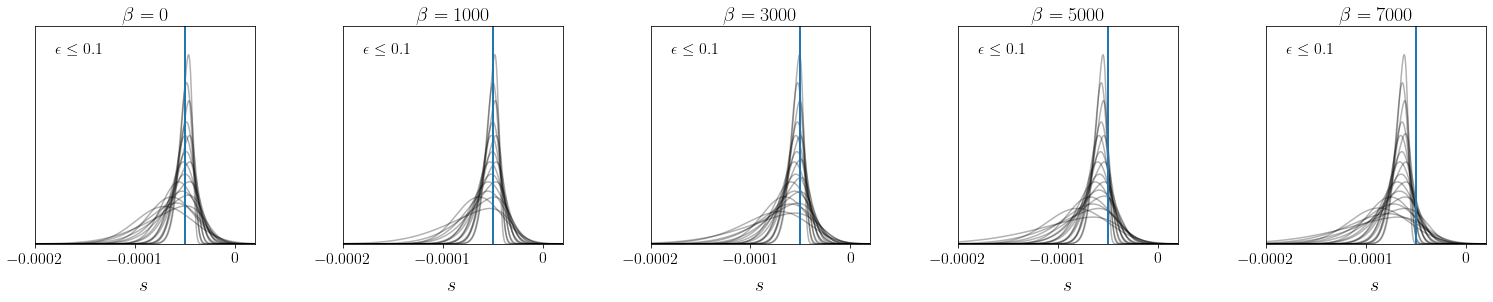

In [687]:
plt.figure(figsize=(26, 4))

grid = gridspec.GridSpec(ncols=5, nrows=1,
                         width_ratios=[1, 1, 1, 1, 1], wspace=0.4,
                         height_ratios=[1], hspace=0.5)
points = []
for i in range(len(beta)):
    
    plt.subplot(grid[i // len(beta), i % len(beta)])
    
    for j in sbs_het_sim:
        if '{:.0f}'.format(beta[i]) != j[3]:
            continue
        
        abs_error = abs(float(j[-1]) - sbs_het_mateusz) / sbs_het_mateusz
   
        if abs_error <= 0.1:
        
            points.append('_'.join(['mu=' + j[0], 'sigma=' + j[1], 'alpha=' + j[2], 'beta=' + j[3]]))
            
            # shape parameter α, location parameter μ, and scale parameter σ
            # 0 is mu (loc)
            # 1 is sigma (scale)
            # 2 is alpha (shape)
            # args: shape, loc, scale
            # 2, 0, 1
            
            xs = np.linspace(-0.0002, 0.00002, num=500)
            ys = [skewnorm.pdf(x, float(j[2]), float(j[0]), float(j[1])) for x in xs]
            
            plt.plot(xs, ys, color='#000000', alpha=0.3)
            # plt.axvline(-5e-5)
    

    plt.text(-0.00018, 70000, r'$\epsilon\leq0.1$', size=16)
            
    plt.yticks([], []); 
    plt.xticks([-0.0002, -0.0001, 0], [r'$-0.0002$', r'$-0.0001$', r'$0$'], size=16);
    
    plt.xlim(-0.0002, 0.00002)
    plt.ylim(0, 80000)
    
    
    plt.xlabel(r'$s$', labelpad=12, fontsize=20);
    plt.title(r'$\beta=' + str(alpha_beta[i][1]) + r'$', fontsize=20)
    
# plt.savefig('pdf_err_H_sbs<=0.1.png', dpi=300, bbox_inches='tight')

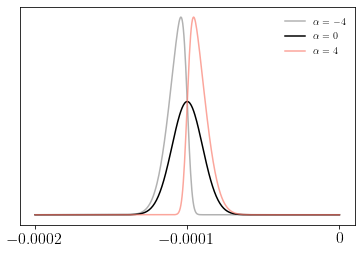

In [644]:
xs = np.linspace(-0.0002, 0, num=500)

plt.plot(xs, [skewnorm.pdf(x, -4, -1e-4, 1e-5) for x in xs], color='#b2b2b2', alpha=1, label=r'$\alpha=-4$')
plt.plot(xs, [skewnorm.pdf(x, 0, -1e-4, 1e-5) for x in xs], color='#000000', alpha=1, label=r'$\alpha=0$')
plt.plot(xs, [skewnorm.pdf(x, 4, -1e-4, 1e-5) for x in xs], color='salmon', alpha=0.7, label=r'$\alpha=4$')

plt.yticks([], []); 
plt.xticks([-0.0002, -0.0001, 0], [r'$-0.0002$', r'$-0.0001$', r'$0$'], size=16);

plt.legend(frameon=False)


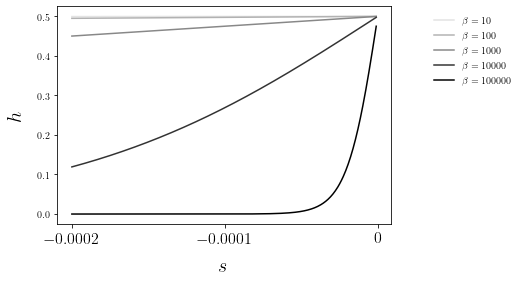

In [679]:
xs = np.linspace(-2e-4, -1e-6, num=500)

plt.plot(xs, [1/(1+math.exp(-10*x)) for x in xs], color='#e3e3e3', alpha=1, label=r'$\beta=10$')
plt.plot(xs, [1/(1+math.exp(-100*x)) for x in xs], color='#b2b2b2', alpha=1, label=r'$\beta=100$')
plt.plot(xs, [1/(1+math.exp(-1000*x)) for x in xs], color='#888888', alpha=1, label=r'$\beta=1000$')
plt.plot(xs, [1/(1+math.exp(-10000*x)) for x in xs], color='#333333', alpha=1, label=r'$\beta=10000$')
plt.plot(xs, [1/(1+math.exp(-100000*x)) for x in xs], color='#000000', alpha=1, label=r'$\beta=100000$')

plt.xticks([-0.0002, -0.0001, 0], [r'$-0.0002$', r'$-0.0001$', r'$0$'], size=16);

plt.legend(frameon=False, bbox_to_anchor=(1.1, 1))

plt.xlabel(r'$s$', labelpad=12, fontsize=20);
plt.ylabel(r'$h$', labelpad=12, fontsize=20);


#plt.savefig('h(s)_1e-4.png', dpi=300, bbox_inches='tight')


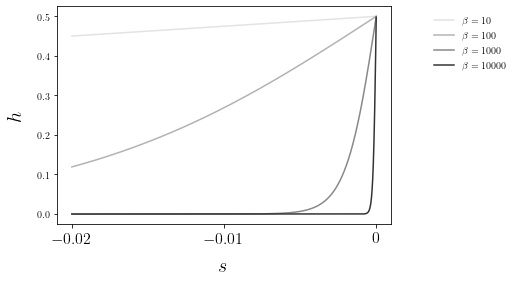

In [685]:
xs = np.linspace(-2e-2, -1e-6, num=5000)

plt.plot(xs, [1/(1+math.exp(-10*x)) for x in xs], color='#e3e3e3', alpha=1, label=r'$\beta=10$')
plt.plot(xs, [1/(1+math.exp(-100*x)) for x in xs], color='#b2b2b2', alpha=1, label=r'$\beta=100$')
plt.plot(xs, [1/(1+math.exp(-1000*x)) for x in xs], color='#888888', alpha=1, label=r'$\beta=1000$')
plt.plot(xs, [1/(1+math.exp(-10000*x)) for x in xs], color='#333333', alpha=1, label=r'$\beta=10000$')
#plt.plot(xs, [1/(1+math.exp(-100000*x)) for x in xs], color='#000000', alpha=1, label=r'$\beta=100000$')

plt.xticks([-0.02, -0.01, 0], [r'$-0.02$', r'$-0.01$', r'$0$'], size=16);

plt.legend(frameon=False, bbox_to_anchor=(1.1, 1))

plt.xlabel(r'$s$', labelpad=12, fontsize=20);
plt.ylabel(r'$h$', labelpad=12, fontsize=20);


#plt.savefig('h(s)_1e-2.png', dpi=300, bbox_inches='tight')


In [432]:
# sbs population size dynamics:

sbs_n_t = []

# stable
n = 2000
for i in range(10000):
    sbs_n_t.append(n)
    
# growth    
n = sbs_n_t[-1]
for i in range(1000):
    n += 6
    sbs_n_t.append(n)
    
# stable
n = sbs_n_t[-1]
for i in range(200):
    sbs_n_t.append(n)
    
# decline
n = sbs_n_t[-1]
for i in range(565):
    n -= 14
    sbs_n_t.append(n)
    

In [487]:
# getting H(t) and # pol (t) at these points

hets_sbs_dict = {}; pols_sbs_dict = {} # dict w/ p as key, list of values as values (t)
 
for p in points:
    
    hets_sbs_p = []; pols_sbs_p = [] # list of values as values (t) for a given p
                
    with open('/Users/alyulina/Projects/Sandpiper/h=sigm/ver23/ver23_data_from_cluster/sbs/SBSv23_' + p + '.txt') as f:
        lines_sbs = f.readlines()
        
        t_0_ids = [lines_sbs.index(x) for x in lines_sbs if 'generation_burnin\t0' in x]
        
        for i in range(len(sbs_n_t)):
            
            ids = [x + i for x in t_0_ids] # get a list of indices for lines at a timepoint
        
            hets_sbs_p.append(np.mean([float(x.split()[11]) for x in map(lines_sbs.__getitem__, ids)]))
            
            # hetero + 2 * homo; this is normalized by genome size inside the program; needs to be normalized by population size though
            pols_sbs_p.append(np.mean([(float(x.split()[9]) + 2 * float(x.split()[7])) for x in map(lines_sbs.__getitem__, ids)]) / sbs_n_t[i])
            
    hets_sbs_dict[p] =  hets_sbs_p
    pols_sbs_dict[p] =  pols_sbs_p
    


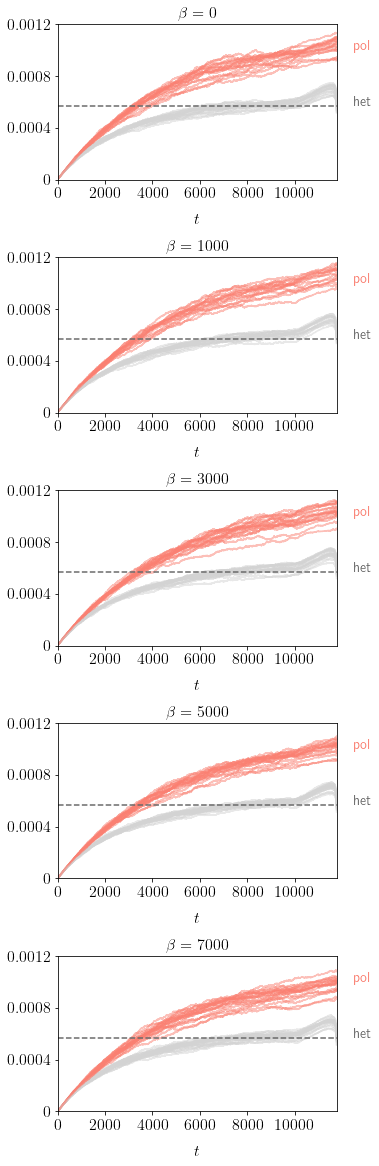

In [545]:
plt.figure(figsize=(5, 20))

grid = gridspec.GridSpec(ncols=1, nrows=5,
                         width_ratios=[1], wspace=0.5,
                         height_ratios=[1, 1, 1, 1, 1], hspace=0.5)
for i in range(len(beta)):
    
    plt.subplot(grid[i])
    
    for j in points:
        if j.split('=')[-1] != '{:.0f}'.format(beta[i]): # only taking points w/ the right beta value
            continue

        plt.plot(range(len(sbs_n_t)), hets_sbs_dict[j], color='#d3d3d3', alpha=0.5)
        plt.plot(range(len(sbs_n_t)), pols_sbs_dict[j], color='salmon', alpha=0.5)
        
    plt.axhline(sbs_het_mateusz, color='#696969', linestyle='--')
    plt.text(12500, sbs_het_mateusz, 'het', size=14, color='#696969')
    plt.text(12500, 0.001, 'pol', size=14, color='salmon')
        
    
        
    plt.yticks([0, 0.0004, 0.0008, 0.0012], [r'$0$', r'$0.0004$', r'$0.0008$', r'$0.0012$'], size=16); 
    plt.xticks([0, 2000, 4000, 6000, 8000, 10000], [r'$0$', r'$2000$', r'$4000$', r'$6000$', r'$8000$', r'$10000$'], size=16);
    
    plt.ylim(0, 0.0012); plt.xlim(0, len(sbs_n_t))
     
    plt.xlabel(r'$t$', labelpad=12, fontsize=16);
    plt.title(r'$\beta=' + str(beta[i]) + r'$', fontsize=16)
    
# plt.savefig('pol_t_err_H_sbs<=0.1.png', dpi=300, bbox_inches='tight')


(array([ 1.,  1.,  1.,  3.,  6.,  6.,  5.,  9.,  7.,  7., 10.,  6.,  5.,
         8.,  6.,  1.,  4.,  1.,  3.,  2.]),
 array([-7.18799000e-05, -6.82536575e-05, -6.46274150e-05, -6.10011725e-05,
        -5.73749300e-05, -5.37486875e-05, -5.01224450e-05, -4.64962025e-05,
        -4.28699600e-05, -3.92437175e-05, -3.56174750e-05, -3.19912325e-05,
        -2.83649900e-05, -2.47387475e-05, -2.11125050e-05, -1.74862625e-05,
        -1.38600200e-05, -1.02337775e-05, -6.60753500e-06, -2.98129250e-06,
         6.44950000e-07]),
 <a list of 20 Patch objects>)

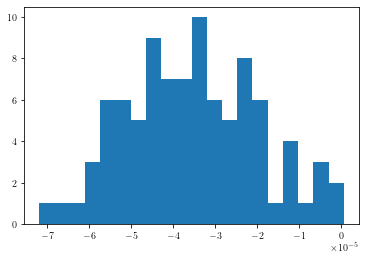

In [701]:
plt.hist([float(x.split('_')[0].split('=')[-1]) + 0.5*float(x.split('_')[1].split('=')[-1]) for x in points], bins=20)

In [555]:
# getting H(t) and # pol (t) for one other point w/ strong s
    
hets_sbs_p = []; pols_sbs_p = [] # list of values as values (t) for a given p
                
with open('/Users/alyulina/Projects/Sandpiper/h=sigm/ver23/ver23_data_from_cluster/sbs/SBSv23_' + 'mu=-0.0100000000_sigma=0.0045974459_alpha=0.0_beta=3000' + '.txt') as f:
    lines_sbs = f.readlines()
        
    t_0_ids = [lines_sbs.index(x) for x in lines_sbs if 'generation_burnin\t0' in x]
        
    for i in range(len(sbs_n_t)):
            
        ids = [x + i for x in t_0_ids] # get a list of indices for lines at a timepoint
        
        hets_sbs_p.append(np.mean([float(x.split()[11]) for x in map(lines_sbs.__getitem__, ids)]))
            
        # hetero + 2 * homo; this is normalized by genome size inside the program; needs to be normalized by population size though
        pols_sbs_p.append(np.mean([(float(x.split()[9]) + 2 * float(x.split()[7])) for x in map(lines_sbs.__getitem__, ids)]) / sbs_n_t[i])
    


Text(0.5, 1.0, 'mu=-0.0100000000, sigma=0.0045974459, alpha=0.0, beta=3000')

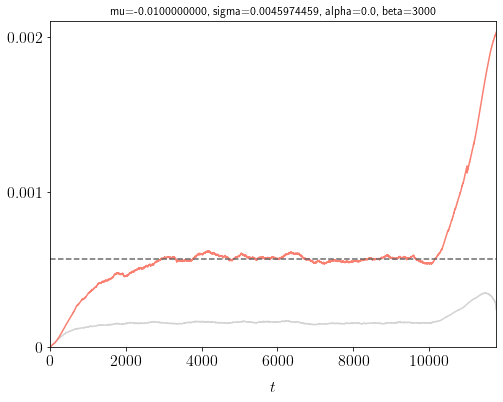

In [568]:
plt.figure(figsize=(8, 6))

plt.plot(range(len(sbs_n_t)), hets_sbs_p, color='#d3d3d3', alpha=1)
plt.plot(range(len(sbs_n_t)), pols_sbs_p, color='salmon', alpha=1)
        
plt.axhline(sbs_het_mateusz, color='#696969', linestyle='--')
    
        
plt.yticks([0, 0.001, 0.002], [r'$0$', r'$0.001$', r'$0.002$'], size=16); 
plt.xticks([0, 2000, 4000, 6000, 8000, 10000], [r'$0$', r'$2000$', r'$4000$', r'$6000$', r'$8000$', r'$10000$'], size=16);
    
plt.ylim(0, 0.0021); plt.xlim(0, len(sbs_n_t))
     
plt.xlabel(r'$t$', labelpad=12, fontsize=16);
plt.title('mu=-0.0100000000, sigma=0.0045974459, alpha=0.0, beta=3000')
#plt.title(r'$\beta=' + str(beta[i]) + r'$', fontsize=16)

#plt.savefig('pol_t_s=-1e-2.png', dpi=300, bbox_inches='tight')

In [578]:
# getting H(t) and # pol (t) for one other point w/ strong s for rns 

rns_n_t = [5000 for t in range(0, 30000)]
    
hets_rns_p = []; pols_rns_p = [] # list of values as values (t) for a given p
                
with open('/Users/alyulina/Projects/Sandpiper/h=sigm/ver23/ver23_data_from_cluster/rns/RNSv23_' + 'mu=-0.0100000000_sigma=0.0045974459_alpha=0.0_beta=3000' + '.txt') as f:
    lines_rns = f.readlines()
        
    t_0_ids = [lines_rns.index(x) for x in lines_rns if 'generation\t0' in x]
        
    for i in range(len(rns_n_t)):
            
        ids = [x + i for x in t_0_ids] # get a list of indices for lines at a timepoint
        
        hets_rns_p.append(np.mean([float(x.split()[11]) for x in map(lines_rns.__getitem__, ids)]))
            
        # hetero + 2 * homo; this is normalized by genome size inside the program; needs to be normalized by population size though
        pols_rns_p.append(np.mean([(float(x.split()[9]) + 2 * float(x.split()[7])) for x in map(lines_rns.__getitem__, ids)]) / rns_n_t[i])
    


Text(0.5, 1.0, 'mu=-0.0100000000, sigma=0.0045974459, alpha=0.0, beta=3000')

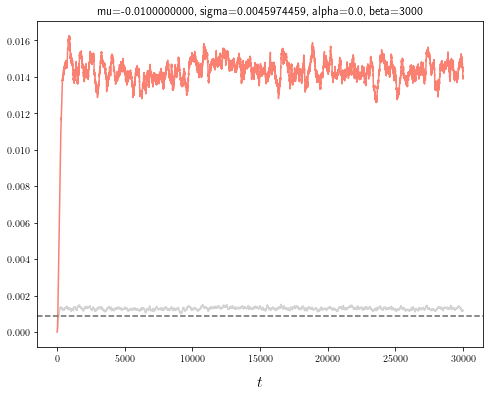

In [582]:
plt.figure(figsize=(8, 6))

plt.plot(range(len(rns_n_t)), hets_rns_p, color='#d3d3d3', alpha=1)
plt.plot(range(len(rns_n_t)), pols_rns_p, color='salmon', alpha=1)
        
plt.axhline(rns_het_mateusz, color='#696969', linestyle='--')
    
        
#plt.yticks([0, 0.001, 0.002], [r'$0$', r'$0.001$', r'$0.002$'], size=16); 
#plt.xticks([0, 2000, 4000, 6000, 8000, 10000], [r'$0$', r'$2000$', r'$4000$', r'$6000$', r'$8000$', r'$10000$'], size=16);
    
#plt.ylim(0, 0.0021); plt.xlim(0, len(sbs_n_t))
     
plt.xlabel(r'$t$', labelpad=12, fontsize=16);
plt.title('mu=-0.0100000000, sigma=0.0045974459, alpha=0.0, beta=3000')
#plt.title(r'$\beta=' + str(beta[i]) + r'$', fontsize=16)

#plt.savefig('pol_t_s=-1e-2.png', dpi=300, bbox_inches='tight')

In [584]:
# getting H(t) and # pol (t) for one other point w/ strong s for rns 

rns_n_t = [5000 for t in range(0, 30000)]
    
hets_rns_p = []; pols_rns_p = [] # list of values as values (t) for a given p
                
with open('/Users/alyulina/Projects/Sandpiper/h=sigm/ver23/ver23_data_from_cluster/rns/RNSv23_' + 'mu=-0.0000514953_sigma=0.0000132194_alpha=0.0_beta=0' + '.txt') as f:
    lines_rns = f.readlines()
        
    t_0_ids = [lines_rns.index(x) for x in lines_rns if 'generation\t0' in x]
        
    for i in range(len(rns_n_t)):
            
        ids = [x + i for x in t_0_ids] # get a list of indices for lines at a timepoint
        
        hets_rns_p.append(np.mean([float(x.split()[11]) for x in map(lines_rns.__getitem__, ids)]))
            
        # hetero + 2 * homo; this is normalized by genome size inside the program; needs to be normalized by population size though
        pols_rns_p.append(np.mean([(float(x.split()[9]) + 2 * float(x.split()[7])) for x in map(lines_rns.__getitem__, ids)]) / rns_n_t[i])
    


Text(0.5, 1.0, 'mu=-0.0000514953, sigma=0.0000132194, alpha=0.0, beta=0')

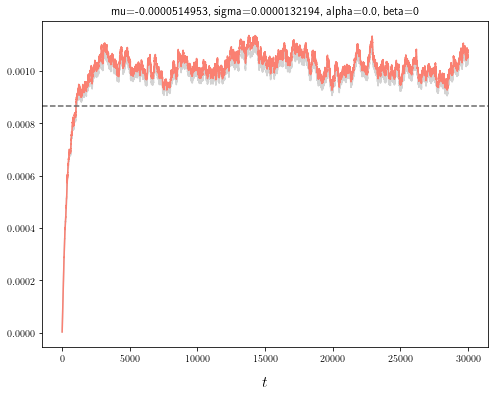

In [585]:
plt.figure(figsize=(8, 6))

plt.plot(range(len(rns_n_t)), hets_rns_p, color='#d3d3d3', alpha=1)
plt.plot(range(len(rns_n_t)), pols_rns_p, color='salmon', alpha=1)
        
plt.axhline(rns_het_mateusz, color='#696969', linestyle='--')
    
        
#plt.yticks([0, 0.001, 0.002], [r'$0$', r'$0.001$', r'$0.002$'], size=16); 
#plt.xticks([0, 2000, 4000, 6000, 8000, 10000], [r'$0$', r'$2000$', r'$4000$', r'$6000$', r'$8000$', r'$10000$'], size=16);
    
#plt.ylim(0, 0.0021); plt.xlim(0, len(sbs_n_t))
     
plt.xlabel(r'$t$', labelpad=12, fontsize=16);
plt.title('mu=-0.0000514953, sigma=0.0000132194, alpha=0.0, beta=0')
#plt.title(r'$\beta=' + str(beta[i]) + r'$', fontsize=16)

#plt.savefig('pol_t_s=-1e-2.png', dpi=300, bbox_inches='tight')

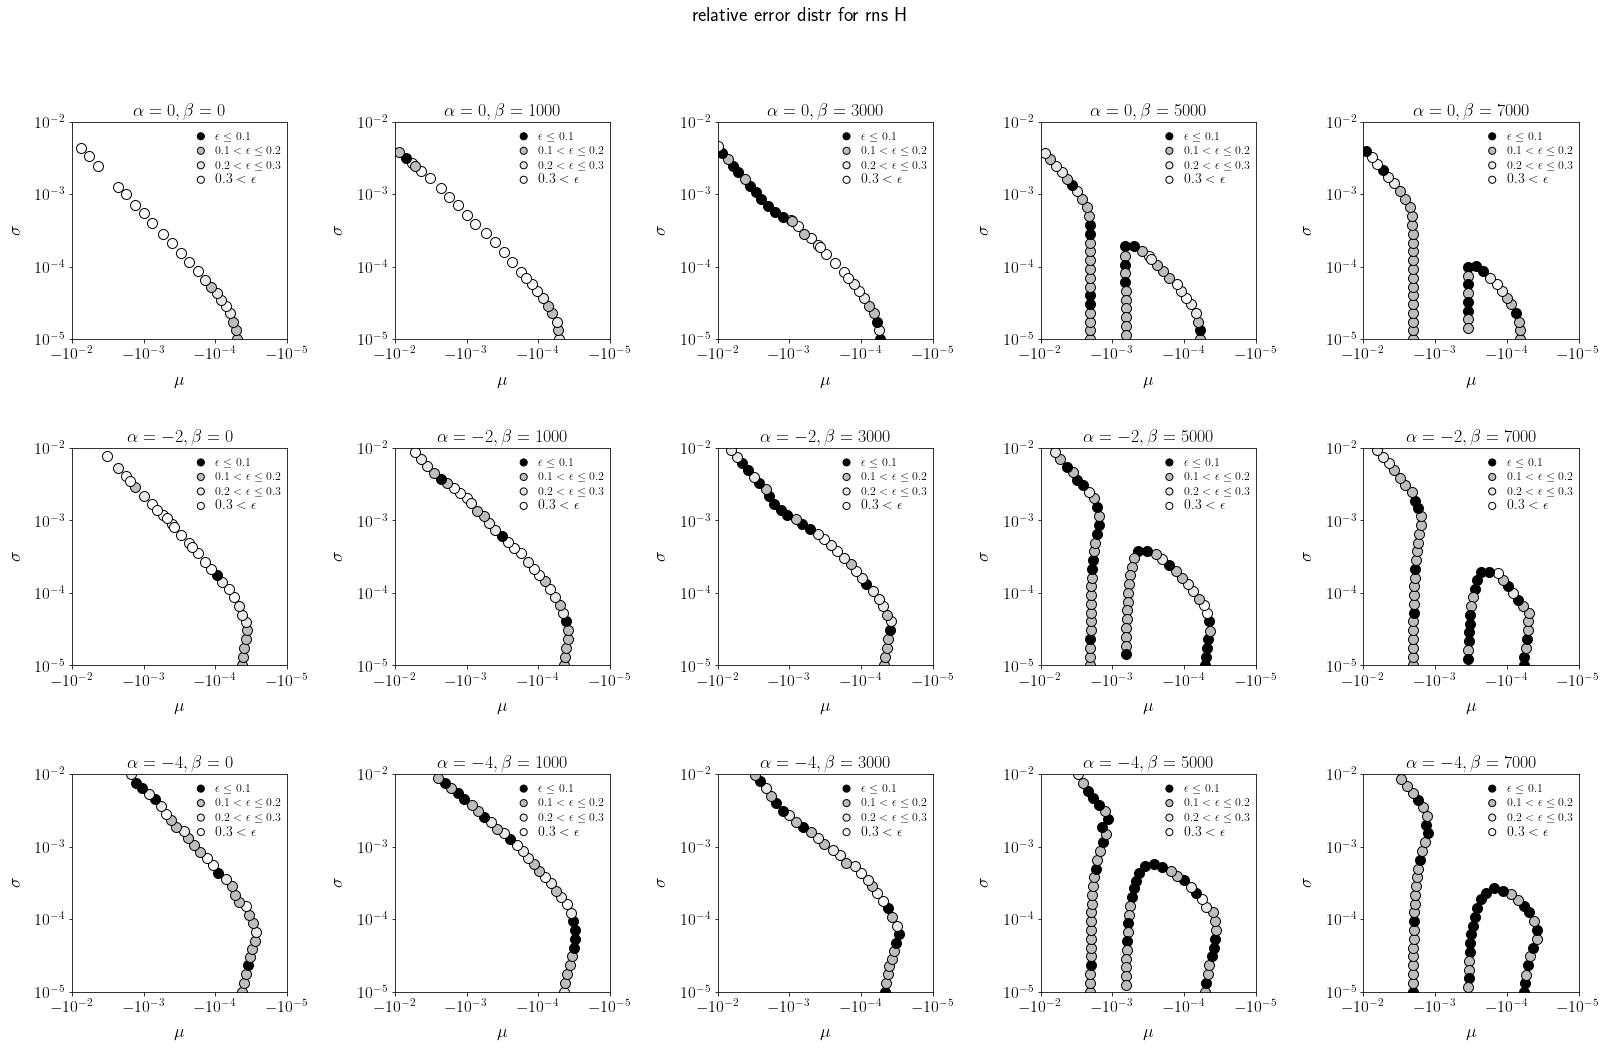

In [388]:
plt.figure(figsize=(27, 16))

grid = gridspec.GridSpec(ncols=5, nrows=3,
                         width_ratios=[1, 1, 1, 1, 1], wspace=0.5,
                         height_ratios=[1, 1, 1], hspace=0.5)

for i in range(len(alpha_beta)):
    
    plt.subplot(grid[i // len(beta), i % len(beta)])
    
    for j in rns_het_sim:
        if ['{:.1f}'.format(alpha_beta[i][0]), '{:.0f}'.format(alpha_beta[i][1])] != j[-3:-1]:
            continue
            
        abs_error = abs(float(j[-1]) - rns_het_mateusz) / rns_het_mateusz
        
        if abs_error <= 0.1:
            c = '#000000'
        elif abs_error <= 0.2:
            c = '#bdbdbd'
        elif abs_error <= 0.3:
            c = '#e8e8e8'
        else: 
            c = '#ffffff'
            
        plt.scatter(-np.log(abs(float(j[0]))), np.log(float(j[1])), s=100, color=c, edgecolors='#000000')
        
    plt.scatter([-np.log(abs(-0.00016)), -np.log(abs(-0.00016)), -np.log(abs(-0.00016)), -np.log(abs(-0.00016))], 
                [np.log(0.00158489), np.log(0.00251189), np.log(0.00398107), np.log(0.00630957)], 
                s=50,
                edgecolors='#000000', 
                color=['#ffffff', '#e8e8e8', '#bdbdbd', '#000000'])
    
    plt.text(-np.log(abs(-0.0001)), np.log(0.00630957), r'$\epsilon\leq0.1$', size=12, va='center')
    plt.text(-np.log(abs(-0.0001)), np.log(0.00398107), r'$0.1<\epsilon\leq0.2$', size=12, va='center')
    plt.text(-np.log(abs(-0.0001)), np.log(0.00251189), r'$0.2<\epsilon\leq0.3$', size=12, va='center')
    plt.text(-np.log(abs(-0.0001)), np.log(0.00158489), r'$0.3<\epsilon$', size=14, va='center')
        
    plt.xlim(-np.log(abs(-0.01)), -np.log(abs(0.00001)))
    plt.ylim(np.log(abs(0.00001)), np.log(abs(0.01)))

    plt.yticks([np.log(0.01), np.log(0.001), np.log(0.0001), np.log(0.00001)], [r'$10^{-2}$', r'$10^{-3}$', r'$10^{-4}$', r'$10^{-5}$'], fontsize=16)
    plt.xticks([-np.log(abs(-0.01)), -np.log(abs(-0.001)), -np.log(abs(-0.0001)), -np.log(abs(-0.00001))], [r'$-10^{-2}$', r'$-10^{-3}$', r'$-10^{-4}$', r'$-10^{-5}$'], fontsize=16)

    plt.xlabel(r'$\mu$', labelpad=12, fontsize=18);
    plt.ylabel(r'$\sigma$', labelpad=12, fontsize=18);
    plt.title(r'$\alpha=' + str(alpha_beta[i][0]) + r', \beta=' + str(alpha_beta[i][1]) + r'$', fontsize=18)
    
plt.suptitle('relative error distr for rns H', fontsize=20)
    
# plt.savefig('relative_error_in_H_rns<=0.1.png', dpi=300, bbox_inches='tight')

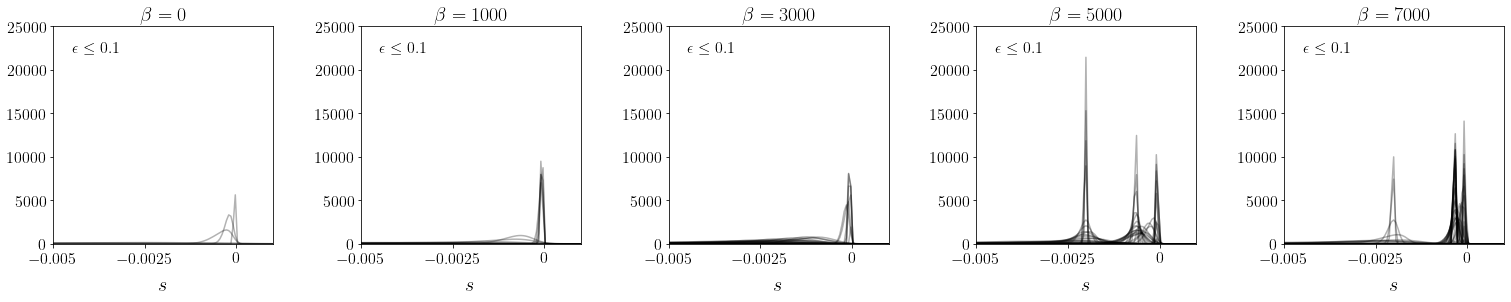

In [362]:
plt.figure(figsize=(26, 4))

grid = gridspec.GridSpec(ncols=5, nrows=1,
                         width_ratios=[1, 1, 1, 1, 1], wspace=0.4,
                         height_ratios=[1], hspace=0.5)

for i in range(len(beta)):
    
    plt.subplot(grid[i // len(beta), i % len(beta)])
    
    for j in rns_het_sim:
        if '{:.0f}'.format(beta[i]) != j[3]:
            continue
        
        abs_error = abs(float(j[-1]) - rns_het_mateusz) / rns_het_mateusz
        #print(abs_error)
        if abs_error <= 0.1:
            
            # shape parameter α, location parameter μ, and scale parameter σ
            # 0 is mu (loc)
            # 1 is sigma (scale)
            # 2 is alpha (shape)
            # args: shape, loc, scale
            # 2, 0, 1
            
            plt.plot(np.linspace(-0.05, 0.01, num=1000), [skewnorm.pdf(x, float(j[2]), float(j[0]), float(j[1])) for x in np.linspace(-0.05, 0.01, num=1000)], color='#000000', alpha=0.3)
    

    plt.text(-0.0045, 22000, r'$\epsilon\leq0.1$', size=16)
            
    plt.yticks(size=16); 
    plt.xticks([-0.005, -0.0025, 0], [r'$-0.005$', r'$-0.0025$', r'$0$'], size=16);
    
    plt.xlim(-0.005, 0.001)
    plt.ylim(0, 25000)
    
    
    plt.xlabel(r'$s$', labelpad=12, fontsize=20);
    plt.title(r'$\beta=' + str(alpha_beta[i][1]) + r'$', fontsize=20)
    
# plt.savefig('pdf_err_H_rns<=0.1.png', dpi=300, bbox_inches='tight')

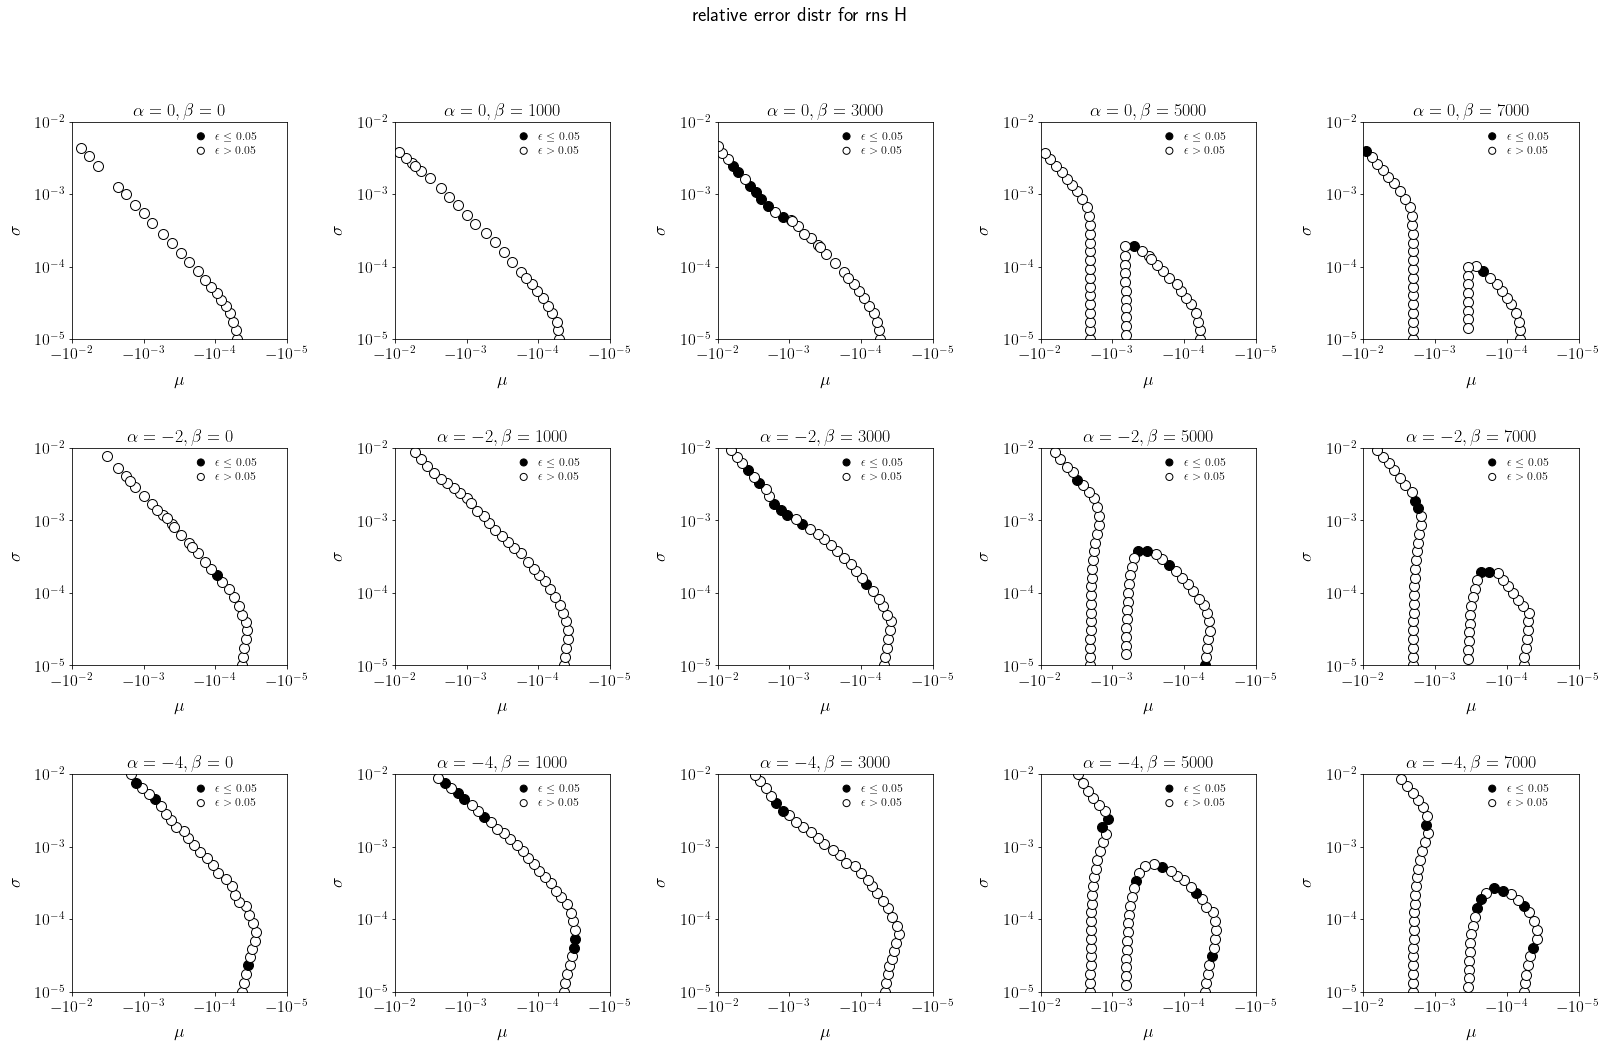

In [389]:
plt.figure(figsize=(27, 16))

grid = gridspec.GridSpec(ncols=5, nrows=3,
                         width_ratios=[1, 1, 1, 1, 1], wspace=0.5,
                         height_ratios=[1, 1, 1], hspace=0.5)

for i in range(len(alpha_beta)):
    
    plt.subplot(grid[i // len(beta), i % len(beta)])
    
    for j in rns_het_sim:
        if ['{:.1f}'.format(alpha_beta[i][0]), '{:.0f}'.format(alpha_beta[i][1])] != j[-3:-1]:
            continue
            
        abs_error = abs(float(j[-1]) - rns_het_mateusz) / rns_het_mateusz
        
        if abs_error <= 0.05:
            c = '#000000'
        else: 
            c = '#ffffff'
            
        plt.scatter(-np.log(abs(float(j[0]))), np.log(float(j[1])), s=100, color=c, edgecolors='#000000')
        
    plt.scatter([-np.log(abs(-0.00016)), -np.log(abs(-0.00016))], 
                [np.log(0.00398107), np.log(0.00630957)], 
                s=50,
                edgecolors='#000000', 
                color=['#ffffff', '#000000'])
    
    plt.text(-np.log(abs(-0.0001)), np.log(0.00630957), r'$\epsilon\leq0.05$', size=12, va='center')
    plt.text(-np.log(abs(-0.0001)), np.log(0.00398107), r'$\epsilon>0.05$', size=12, va='center')

        
    plt.xlim(-np.log(abs(-0.01)), -np.log(abs(0.00001)))
    plt.ylim(np.log(abs(0.00001)), np.log(abs(0.01)))

    plt.yticks([np.log(0.01), np.log(0.001), np.log(0.0001), np.log(0.00001)], [r'$10^{-2}$', r'$10^{-3}$', r'$10^{-4}$', r'$10^{-5}$'], fontsize=16)
    plt.xticks([-np.log(abs(-0.01)), -np.log(abs(-0.001)), -np.log(abs(-0.0001)), -np.log(abs(-0.00001))], [r'$-10^{-2}$', r'$-10^{-3}$', r'$-10^{-4}$', r'$-10^{-5}$'], fontsize=16)

    plt.xlabel(r'$\mu$', labelpad=12, fontsize=18);
    plt.ylabel(r'$\sigma$', labelpad=12, fontsize=18);
    plt.title(r'$\alpha=' + str(alpha_beta[i][0]) + r', \beta=' + str(alpha_beta[i][1]) + r'$', fontsize=18)
    
plt.suptitle('relative error distr for rns H', fontsize=20)
    
# plt.savefig('relative_error_in_H_rns<=0.05.png', dpi=300, bbox_inches='tight')

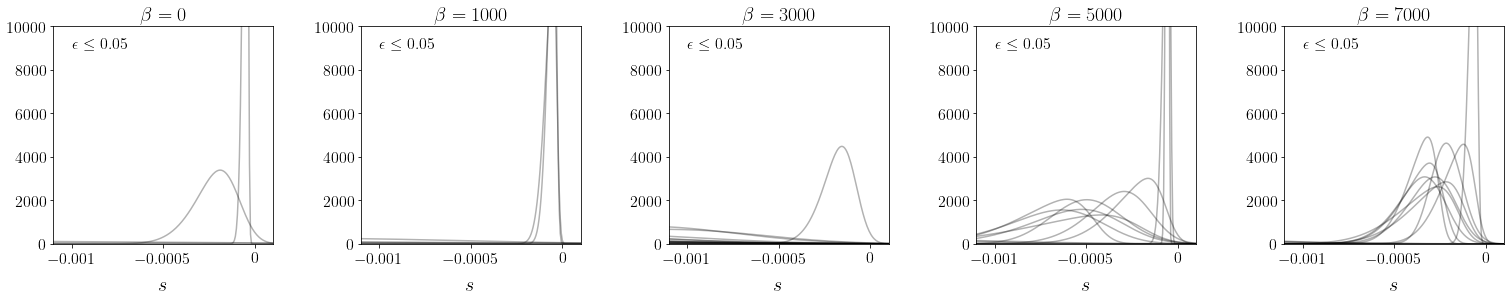

In [360]:
plt.figure(figsize=(26, 4))

grid = gridspec.GridSpec(ncols=5, nrows=1,
                         width_ratios=[1, 1, 1, 1, 1], wspace=0.4,
                         height_ratios=[1], hspace=0.5)

for i in range(len(beta)):
    
    plt.subplot(grid[i // len(beta), i % len(beta)])
    
    for j in rns_het_sim:
        if '{:.0f}'.format(beta[i]) != j[3]:
            continue
        
        abs_error = abs(float(j[-1]) - rns_het_mateusz) / rns_het_mateusz
        #print(abs_error)
        if abs_error <= 0.05:
            
            # shape parameter α, location parameter μ, and scale parameter σ
            # 0 is mu (loc)
            # 1 is sigma (scale)
            # 2 is alpha (shape)
            # args: shape, loc, scale
            # 2, 0, 1
            
            xs=np.linspace(-0.005, 0.0005, num=1000)
            plt.plot(xs, [skewnorm.pdf(x, float(j[2]), float(j[0]), float(j[1])) for x in xs], color='#000000', alpha=0.3)
    
    plt.text(-0.001, 9000, r'$\epsilon\leq0.05$', size=16)
            
    plt.yticks(size=16); 
    plt.xticks([-0.001, -0.0005, 0], [r'$-0.001$', r'$-0.0005$', r'$0$'], size=16);
    
    plt.xlim(-0.0011, 0.0001)
    plt.ylim(0, 10000)
    
    
    plt.xlabel(r'$s$', labelpad=12, fontsize=20);
    plt.title(r'$\beta=' + str(alpha_beta[i][1]) + r'$', fontsize=20)
    
# plt.savefig('pdf_err_H_rns<=0.05.png', dpi=300, bbox_inches='tight')

In [ ]:
plt.figure(figsize=(27, 16))

grid = gridspec.GridSpec(ncols=5, nrows=3,
                         width_ratios=[1, 1, 1, 1, 1], wspace=0.5,
                         height_ratios=[1, 1, 1], hspace=0.5)

for i in range(len(alpha_beta)):
    
    plt.subplot(grid[i // len(beta), i % len(beta)])
    
    for j in rns_het_sim:
        if ['{:.1f}'.format(alpha_beta[i][0]), '{:.0f}'.format(alpha_beta[i][1])] != j[-3:-1]:
            continue
            
        abs_error = abs(float(j[-1]) - rns_het_mateusz) / rns_het_mateusz
        
        if abs_error <= 0.05:
            c = '#000000'
        else: 
            c = '#ffffff'
            
        plt.scatter(-np.log(abs(float(j[0]))), np.log(float(j[1])), s=100, color=c, edgecolors='#000000')
        
    plt.scatter([-np.log(abs(-0.00016)), -np.log(abs(-0.00016))], 
                [np.log(0.00398107), np.log(0.00630957)], 
                s=50,
                edgecolors='#000000', 
                color=['#ffffff', '#000000'])
    
    plt.text(-np.log(abs(-0.0001)), np.log(0.00630957), r'$\epsilon\leq0.05$', size=12, va='center')
    plt.text(-np.log(abs(-0.0001)), np.log(0.00398107), r'$\epsilon>0.05$', size=12, va='center')

        
    plt.xlim(-np.log(abs(-0.01)), -np.log(abs(0.00001)))
    plt.ylim(np.log(abs(0.00001)), np.log(abs(0.01)))

    plt.yticks([np.log(0.01), np.log(0.001), np.log(0.0001), np.log(0.00001)], [r'$10^{-2}$', r'$10^{-3}$', r'$10^{-4}$', r'$10^{-5}$'], fontsize=16)
    plt.xticks([-np.log(abs(-0.01)), -np.log(abs(-0.001)), -np.log(abs(-0.0001)), -np.log(abs(-0.00001))], [r'$-10^{-2}$', r'$-10^{-3}$', r'$-10^{-4}$', r'$-10^{-5}$'], fontsize=16)

    plt.xlabel(r'$\mu$', labelpad=12, fontsize=18);
    plt.ylabel(r'$\sigma$', labelpad=12, fontsize=18);
    plt.title(r'$\alpha=' + str(alpha_beta[i][0]) + r', \beta=' + str(alpha_beta[i][1]) + r'$', fontsize=18)
    
plt.suptitle('relative error distr for rns H', fontsize=20)
    
# plt.savefig('relative_error_in_H_rns<=0.05.png', dpi=300, bbox_inches='tight')